        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington

<h1 align='center' style="color: blue;">Assignment #3</h1>

<p><b>Question #1</b>
    <ol>
        <li>Download the diabetes.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
        <li>Use <u>Decision Tree</u> to create a prediction model:</li>
        <ul>
            <li>Use grid search to find the depth of tree (try values between 2-8)</li>
            <li>Use 5-fold stratified cross validation in your work.</li> 
            <li><b>Outcome</b> is your dependent variable</li>
            <li>Use all other features as independent variables</li>
        </ul>
        <li>Perform Additional Data Aanalysis:</li>
        <ul>
            <li>Use full dataset to create another predictive model using Decision Tree (use the best depth that you found in last step)</li>
            <li>What is the in-sample prediction accuracy?</li>
            <li>Find the feature importance.(How you can interpret it)</li>
        </ul>
        <li>Create three predction models using Logistic Regression, SVM, and Random Forest:</li>
        <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li> Report the out-sample accuracy for all models</li>
        </ul>
        <li>Compute Precision, Recall, F1 and AUC values for the prediction models in the last step. Which one has the best performance. (Write your logit for selection of the best model)</li>
        <li>Draw ROC Curve for Logistic Regression model</li>
    </ol>
            

In [9]:
# Write your answer here (part1)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Write your answer here (part2)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV



X = df.loc[:,:"Age"]
y = df.loc[:,["Outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

model = DecisionTreeClassifier()

param_grid = {'max_depth': [2,3,4,5,6,7,8]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')

grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


Best Parameter: {'max_depth': 2}
Best Cross Vlidation Score: 0.7517361111111112


In [11]:
# Write your answer here (part3)
from sklearn.metrics import accuracy_score

dic_feat_imp = {}
X = df.loc[:,:"Age"]
y = df.loc[:,["Outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

model = DecisionTreeClassifier(max_depth=2)

model.fit(X_train,y_train)

y_train_hat  = model.predict(X_train)
y_test_hat  = model.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

model_imp = model.feature_importances_
columns = df.columns

for i in range(len(model_imp)):
    dic_feat_imp[columns[i]] = model_imp[i] 

print("\nThe feature importance:")
dic_feat_imp



In-sample Accuracy:  74.82638888888889
Out-of-sample Accuracy:  75.0

The feature importance:


{'Pregnancies': 0.0,
 'Glucose': 0.7645713507423236,
 'BloodPressure': 0.0,
 'SkinThickness': 0.0,
 'Insulin': 0.0,
 'BMI': 0.0,
 'DiabetesPedigreeFunction': 0.0,
 'Age': 0.2354286492576763}

In [12]:
# Write your answer here (part4)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score


model1 = LogisticRegression()


X = df.loc[:,:"Age"]
y = df.loc[:,["Outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

model1.fit(X_train, y_train.values.ravel())

y_test_hat1 = model1.predict(X_test)


out_of_sample_acc1 = accuracy_score(y_test,y_test_hat1, normalize = True) * 100


print("Accuracy of Logistic Regression:",out_of_sample_acc1)




Accuracy of Logistic Regression: 78.35497835497836


C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
model2 = SVC(kernel='linear', random_state=0)
model2.fit(X_train, y_train.values.ravel())                      

y_test_hat2 = model2.predict(X_test)

out_of_sample_acc2 = accuracy_score(y_test,y_test_hat2, normalize = True) * 100

print("Accuracy of SVM:",out_of_sample_acc2)


Accuracy of SVM: 78.35497835497836


In [14]:
model3 = RandomForestClassifier(n_estimators=100, random_state=0)


model3.fit(X_train,y_train.values.ravel())


y_test_hat3 = model3.predict(X_test)

out_of_sample_acc3 = accuracy_score(y_test,y_test_hat3, normalize = True) * 100

print("Accuracy of Random forest:",out_of_sample_acc3)

Accuracy of Random forest: 77.92207792207793


In [15]:
# Write your answer here (part5)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_test_hat1))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.72      0.53      0.61        74

   micro avg       0.78      0.78      0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



In [16]:
print(classification_report(y_test,y_test_hat2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

   micro avg       0.78      0.78      0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



In [17]:
print(classification_report(y_test,y_test_hat3))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

   micro avg       0.78      0.78      0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



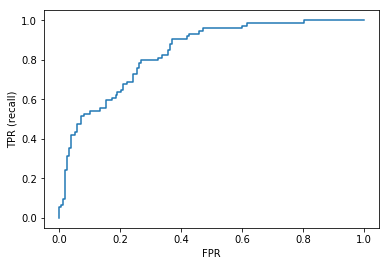

In [18]:
# Write your answer here (part6)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline


fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

<p><b>Question #2</b>: Consider the following dataset 

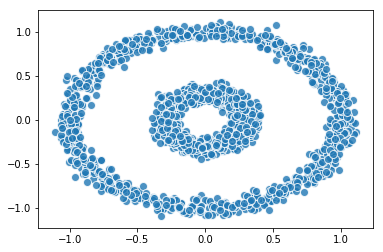

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
N_samples = 2000
X = np.array(datasets.make_circles(n_samples=N_samples,
                                   noise=0.05, factor=0.3)[0])    
plt.scatter(X[:,0], X[:,1], alpha=0.8, s=64, edgecolors='white');

<ol>
    <li>Use K-Means to cluster the points and visualize your result</li>
    <li>Use Spectral Clustering to cluster the points and visualize your result</li>
    <li>Use Agglomerative Clustering to cluster the points and visualize your result</li>
    <li>Use DBSCAN to cluster the points and visualize your result</li>
    <li>(optional) Use HDBSCAN to cluster the points and visualize your result</li>
</ol>

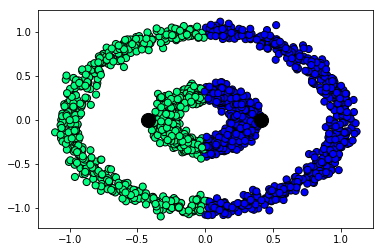

In [20]:
# Write your answer here (part1)

from sklearn.cluster import KMeans 

kmeans_model = KMeans(n_clusters=2, random_state=0) 
kmeans_model.fit(X)                            
y_kmeans = kmeans_model.predict(X)             
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter', edgecolors='Black');

centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


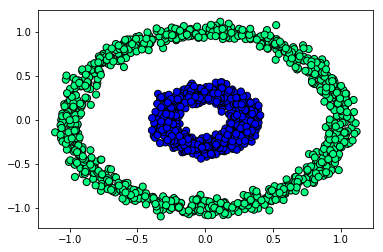

In [21]:
# Write your answer here (part2)

from sklearn.cluster import SpectralClustering 
model = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors',
                           assign_labels='kmeans',
                           n_neighbors = 6)
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='winter', edgecolors= 'black')

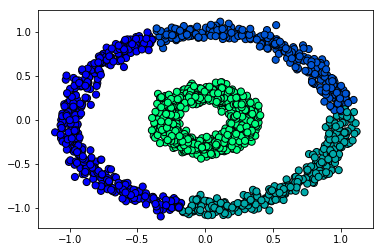

In [22]:
# Write your answer here (part3)

from sklearn.cluster import AgglomerativeClustering
y_agg = AgglomerativeClustering(n_clusters = 4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='winter', edgecolors= 'black')

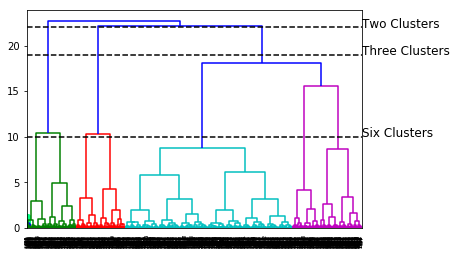

In [23]:

from scipy.cluster.hierarchy import dendrogram, ward
agg_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_agglo = agg_model.fit_predict(X)                
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, s=50, cmap='winter');
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca() 
bounds = ax.get_xbound()
ax.plot(bounds, [10,10], '--', c='k')
ax.plot(bounds, [19,19], '--', c='k')
ax.plot(bounds, [22,22], '--', c='k')

ax.text(bounds[1], 10, 'Six Clusters', fontdict={'size':12});
ax.text(bounds[1], 19, 'Three Clusters', fontdict={'size':12})
ax.text(bounds[1], 22, 'Two Clusters', fontdict={'size':12});

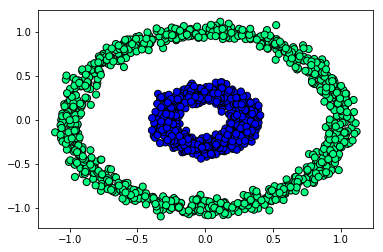

In [24]:
# Write your answer here (part4)

from sklearn.cluster import DBSCAN
y_dbscan = DBSCAN(min_samples=4, eps=.3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='winter', edgecolors= 'black');

In [ ]:
# Write your answer here (part5)

# !conda install -c conda-forge hdbscan
# import hdbscan
# clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
# clst = clusterer.fit(X)
# plt.scatter(X[:, 0], X[:, 1], c=clst, s=50, cmap='winter', edgecolors= 'black');


<p><b>Question #3</b>: Consider the following image (<u>Download the France.jpg file from Canvas</u>)

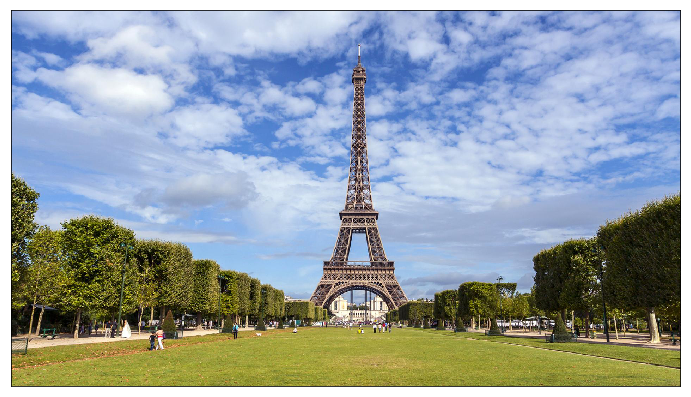

In [25]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 18))
France = np.array(mpimg.imread('France.jpg'))
ax.imshow(France)
ax.set(xticks=[], yticks=[]);

<ol>
    <li>Reduce the number of colors to 64 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 16 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 8 and visualize the image (use K-Means)</li>
</ol>

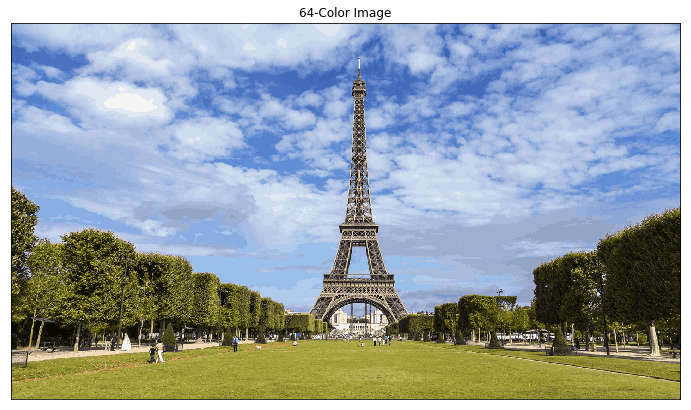

In [26]:
# Write your answer here (part1)
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
import matplotlib.pyplot as plt

data = France / 255.0 
X = data.reshape(1068 * 1900, 3)

kmeans_model = MiniBatchKMeans(64)
kmeans_model.fit(X)
kmeans_model.cluster_centers_
y_kmeans = kmeans_model.predict(X)
new_colors = kmeans_model.cluster_centers_[kmeans_model.predict(X)]

France_recolored = new_colors.reshape(France.shape)
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(France_recolored)
ax.set(xticks=[], yticks=[]);
ax.set_title('64-Color Image');

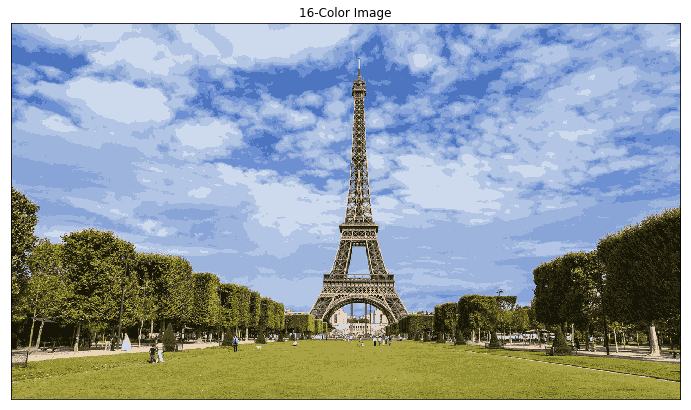

In [5]:
# Write your answer here (part2)
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
import matplotlib.pyplot as plt

data = France / 255.0 
X = data.reshape(1068 * 1900, 3)

kmeans_model = MiniBatchKMeans(16)
kmeans_model.fit(X)
kmeans_model.cluster_centers_
y_kmeans = kmeans_model.predict(X)
new_colors = kmeans_model.cluster_centers_[kmeans_model.predict(X)]

France_recolored = new_colors.reshape(France.shape)
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(France_recolored)
ax.set(xticks=[], yticks=[]);
ax.set_title('16-Color Image');

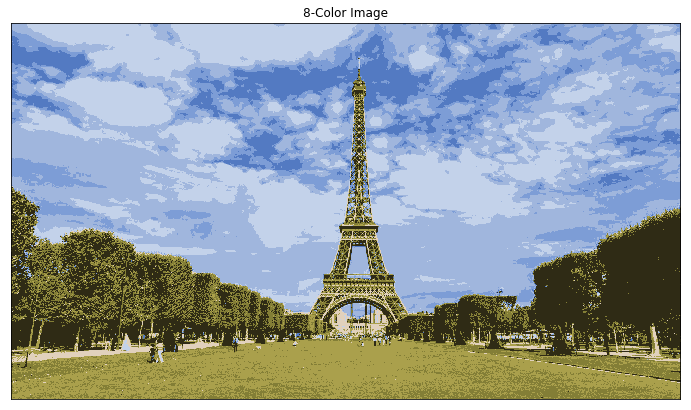

In [27]:
# Write your answer here (part3)
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
import matplotlib.pyplot as plt

data = France / 255.0 
X = data.reshape(1068 * 1900, 3)

kmeans_model = MiniBatchKMeans(8)
kmeans_model.fit(X)
kmeans_model.cluster_centers_
y_kmeans = kmeans_model.predict(X)
new_colors = kmeans_model.cluster_centers_[kmeans_model.predict(X)]

France_recolored = new_colors.reshape(France.shape)
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(France_recolored)
ax.set(xticks=[], yticks=[]);
ax.set_title('8-Color Image');

<p><b>Question #4</b>: The following code download images of top 200 players (<u>Download Fifa Data from Blackboard</u>)

In [29]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

def read_image(url):
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)).convert('RGB'))
    return img

FIFA20 = pd.read_csv("Fifa20/data.csv")
TOP_200_Players = FIFA20.sort_values(by = ['Overall'], ascending=False)[:200]
images =np.array([read_image(url) for url in TOP_200_Players.Photo])
player_names = np.array([Name for Name in TOP_200_Players.Name])
data = np.array([image.reshape(240*240*3) for image in images])

C:\Users\Amar\Anaconda3\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [30]:
data.shape

(200, 172800)

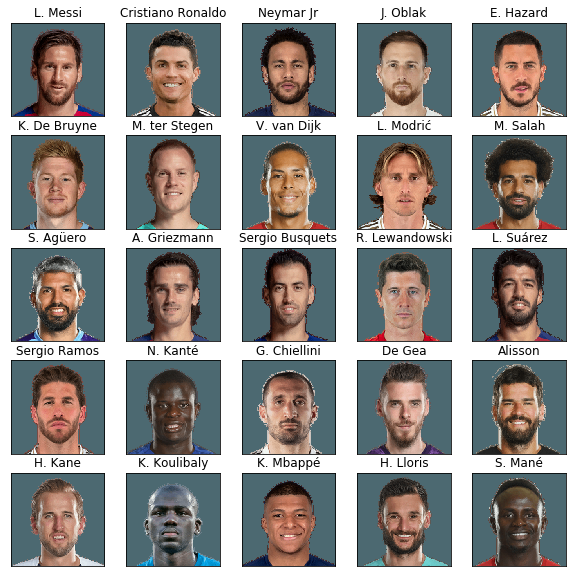

In [31]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i]) 
    axi.set_title(player_names[i]) 
    axi.set(xticks=[], yticks=[])

Here is some description about data
<ul>
    <li>images: contains 200 images of players. images.shape = (200, 240, 240, 3)</li> 
    <li>player_names: contains 200 names of players. player_names.shape = (200,)</li>
    <li>data: contains flatten version of images. data.shape = (200, 172800)</li>
</ul>

You need to cluster the images using K-Means algorithm
<ol>
    <li>Use PCA method to reduce the number of dimensions to 200.</li>
    <li>Find the best number of clusters using elbow method.</li>
    <li>Find the best number of clusters using silhouette method.</li>
    <li>Cluster images using an optimal number of clusters</li>
    <li>Visualize the center of clusters (<b>Tip</b>: to perform this part you have two options: (1) use inverse_transform() function in pca and change back the number of dimensions in cluster centers to 172800 - read more <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'>here</a> ,(2) for each cluster, find the average of all the pixels of the images in the cluster.)</li>
    <li>Show sample of images in each cluster</li>
    <li>How can you interpret the result of clustering</li>
</ol>

In [32]:
# Write your answer here (part1)
from sklearn.decomposition import PCA
pca = PCA(n_components=200, whiten=True, random_state=0)
X = pca.fit_transform(data)
X.shape

(200, 200)

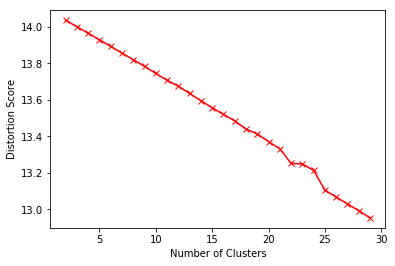

In [42]:
# Write your answer here (part2)
from scipy.spatial.distance import cdist

distortions = []
n_clusters = range(2,30)
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1))/X.shape[0])

# Plot the elbow
plt.plot(n_clusters, distortions, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score');

In [43]:
# Write your answer here (part3)

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans 

n_clusters = range(2,30)
for k in n_clusters:
    # Create the model with different number of clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(X)
    y_kmeans = kmeans_model.predict(X)
    
    silhouette_avg = silhouette_score(X, y_kmeans)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 1.780814454538009e-18
For n_clusters = 3 The average silhouette_score is : -4.362995413618122e-17
For n_clusters = 4 The average silhouette_score is : -4.5410768590719213e-17
For n_clusters = 5 The average silhouette_score is : -7.390379986332734e-17
For n_clusters = 6 The average silhouette_score is : -1.1219131063589453e-16
For n_clusters = 7 The average silhouette_score is : -1.308898624085436e-16
For n_clusters = 8 The average silhouette_score is : -1.7184859486291782e-16
For n_clusters = 9 The average silhouette_score is : -2.1636895622636806e-16
For n_clusters = 10 The average silhouette_score is : -2.0568406949913994e-16
For n_clusters = 11 The average silhouette_score is : -2.1814977068090603e-16
For n_clusters = 12 The average silhouette_score is : -2.341771007717481e-16
For n_clusters = 13 The average silhouette_score is : -1.932183683173739e-16
For n_clusters = 14 The average silhouette_score is : -2.9917682836238535e-16
F

In [44]:
# Write your answer here (part4)

kmeans_model = KMeans(n_clusters=2, random_state=0)
labels = kmeans_model.fit_predict(X)
print("Cluster sizes k-means: {}".format(np.bincount(labels)))

Cluster sizes k-means: [118  82]


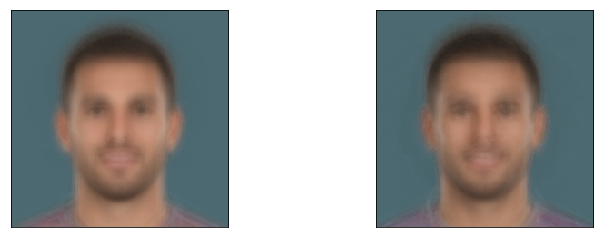

In [45]:
# Write your answer here (part5)

fig, axes = plt.subplots(1,2,subplot_kw={'xticks':(),'yticks':()},figsize=(12,4))
for center,ax in zip(kmeans_model.cluster_centers_,axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(240,240,3).astype(np.uint8))

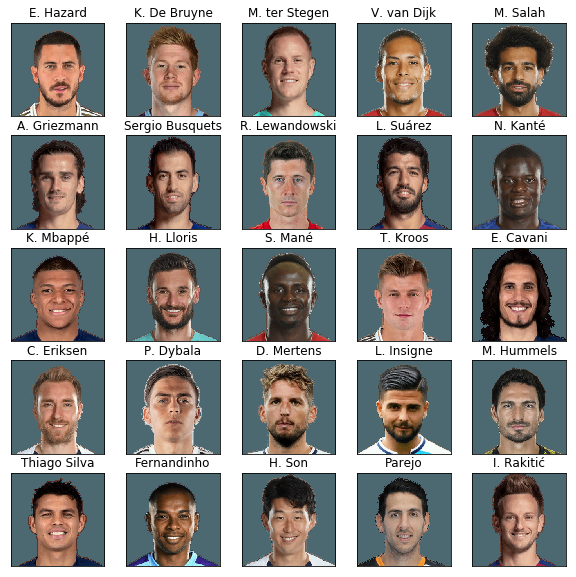

In [46]:
# Write your answer here (part6)

mask = (labels == 1)  
cluster_images = images[mask]
cluster_target = player_names[mask]
fig, ax = plt.subplots(5, 5, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(cluster_images[i].astype(np.uint8)) 
    axi.set_title(cluster_target[i]) 
    axi.set(xticks=[], yticks=[])

In [49]:
# Write your answer here (part7)

print("Here we have 2 clusters. Each cluster here represents a pattern.\nCluster 1 contains the images of football players who are smiling and 2nd is who are not")

Here we have 2 clusters. Each cluster here represents a pattern.
Cluster 1 contains the images of football players who are smiling and 2nd is who are not


<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Create a zip-folder and put your file in it.</li>
        <li>Upload the zip-folder into Canvas (Assignment #3)</li>
        <li>All the assignments should be submitted by <b>Mon Nov 2 at 11:59 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
</p> 